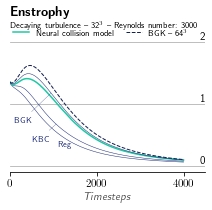

In [3]:
#! python3

# ====================
# ====================
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
import sys


ratio=0.75 # Define side ratio, i.e. ly = ratio * lx
numberOfColumns=1 # Define Width of Figure (For Dissertation use 1.0, 1.5 or 2.0 times 3.5 inch as width)
columnWidth=3.5

# ====================
# Font adjustments
plt.rcParams.update({
    "text.usetex": True,
#     "font.family": "sans-serif",
#     "font.serif": ["Helvetica"],
    "font.size": 11,
    "lines.linewidth": 1.5,
    "lines.markeredgewidth": 2,
    "lines.markersize": 5.0,
    "markers.fillstyle": 'none',
    "figure.figsize": [numberOfColumns*columnWidth,numberOfColumns*ratio*columnWidth],
    "figure.frameon": False,
#     'figure.titleweight': 'bold',
    "axes.spines.left": False,  # display axis spines
    "axes.spines.bottom": True,
    "axes.spines.top": False,
    "axes.spines.right":  False,
    "xtick.top":          False,
    "ytick.right": False,
    "ytick.labelright": True,
    "ytick.left": False,
    "ytick.labelleft": False,
    "ytick.alignment": "bottom",
    'ytick.color': 'black',
    "grid.alpha": 1.0,
    "grid.color": '#b0b0b0',
    "grid.linestyle": '-',
    "grid.linewidth": 0.8,
})

# ====================
# Color

Economist="#e3120b"
White="#fafafa"
DarkGray="#4a4a4a"
HongKong45="#1DC9A4"
HongKong55="#36E2BD"
HongKong90="#D2F9F0"
hongKong95="#E9FCF8"
Tokyo45="#C91D42"
Tokyo55="#E2365B"
Tokyo90="#F9D2DB"
Tokyo95="#FCE9ED"
Chicago20="#141F52"
Chicago30="#1F2E7A"
Chicago45="#2E45B8"
Chicago55="#475ED1"
Chicago90="#D6DBF5"
Chicago95="#EBEDFA"
Singapore55="#F97A1F"

# ====================
# Set up plot
fig, ax1 = plt.subplots()
#ax1.tick_params(axis="y",direction="in", pad = -22)
ax1.grid(b=True, which='major', axis='y')
ax1.tick_params(axis="y",direction="in", pad=0)
ax1.set_title(r"\noindent\textbf{Enstrophy} \\\footnotesize{Decaying turbulence – 32$^{3}$ – Reynolds number: 3000}", loc='left',weight='bold')  # title - sans, bold, left

# ====================
# Load and plot data (Indices start with 0)

data_other=np.load("enstrophy_other_2.npy")
# data_10=np.load("enstrophy_10epochs.npy")
# data_30=np.load("enstrophy_30epochs.npy")
data_cb=np.load("enstrophy_robust.npy")
data_rf=np.load("enstrophy_reference.npy")
time=np.arange(len(data_cb))*10

# ##### Plot data for axis 1 #####
ax1.set_xlabel(r"\textit{Timesteps}", style='italic', color='#525254')

ax1.set_xlim([0,4500])
ax1.set_xticks([0, 2000, 4000])
ax1.set_ylim([-0.1,2.2])
ylabels= ([0,1,2])
ax1.set_yticks(ylabels)
# ax1.set_yticks([3000, 5000, 7000, 9000])
ax1.set_yticklabels(ylabels, ha='right')


ax1.plot(time,data_other[1], marker='', mfc='', linewidth=0.5, linestyle='-', color=Chicago30, label=r'Reg')
ax1.plot(time,data_other[2], marker='', mfc='', linewidth=0.5, linestyle='-', color=Chicago30, label=r'KBC')
# ax1.plot(time,data_10, marker='', mfc='', linestyle='-', color=Tokyo45, label=r'10 epochs')
# end = 138
# ax1.plot(time[:end],data_30[:end], marker='', mfc='', linestyle='-', color=Tokyo45, label=r'10')
ax1.plot(time,data_cb, marker='', mfc='', linestyle='-', color=HongKong45, label=r'Neural collision model')
ax1.plot(time,data_other[0], marker='', mfc='',  linewidth=0.5, linestyle='-', color=Chicago30, label=r'BGK')
ax1.plot(time[:400],data_rf, marker='', mfc='',  linewidth=1, linestyle='--', color=Chicago20, label=r'BGK – 64$^{3}$')
# ax1.annotate(r"\footnotesize{NCM – 30 epochs}",xy=(1400,1.4),ha='left')
# ax1.annotate(r"\footnotesize{NCM – 10 epochs}",xy=(2100,0.6),ha='left')
ax1.annotate(r"\footnotesize{BGK}",
             xy=(980,1.2), xycoords='data', 
             xytext=(100,0.7), textcoords='data',ha='left', color=Chicago30,
             arrowprops=dict(arrowstyle="-", linewidth=0.25,
                            connectionstyle="arc3", color=Chicago30),
            )
ax1.annotate(r"\footnotesize{KBC}",
             xy=(1100,0.7), xycoords='data', 
             xytext=(500,0.4), textcoords='data',ha='left', color=Chicago30,
             arrowprops=dict(arrowstyle="-", linewidth=0.25,
                            connectionstyle="arc3", color=Chicago30),
            )
ax1.annotate(r"\footnotesize{Reg}",xy=(1100,0.3),ha='left', color=Chicago30)

,
#             xy=(0.2, 0.2), xycoords='data',
#             xytext=(0.8, 0.8), textcoords='data',
#             arrowprops=dict(arrowstyle="->",
#                             connectionstyle="arc3"),
#             )
# ax1.plot(data_epoch,data_val, marker='', mfc='', linestyle='-', color=HongKong45, label=r'Testing')
# ax1.vlines(10,3500,6500, linewidth=1, linestyle='--', color=DarkGray)

handles, labels = ax1.get_legend_handles_labels()
# order = np.arange(len(handles))
ax1.legend([handles[2], handles[4]],[labels[2], labels[4]],
          loc=2, bbox_to_anchor=(-0.02, 1.05), frameon=False, ncol=2, columnspacing=1.5,fontsize=8);


outputFileName = "enstrophy_mark-3"
plt.savefig(outputFileName+".pdf",format='pdf',bbox_inches='tight',pad_inches=0)
plt.savefig(outputFileName+".png",format='png',dpi=300,bbox_inches='tight',pad_inches=0,transparent=False)
plt.savefig("../"+outputFileName+".png",format='png',dpi=300,bbox_inches='tight',pad_inches=0,transparent=False)
plt.show()